In [99]:
import torch
import torch.nn as nn

In [100]:
classes = ['pizza','steak','sushi']
classidx = {0:'pizza',1:'steak',2:'sushi'}

In [101]:
from torch.nn.modules.conv import Conv2d
class FoodClassification(nn.Module):
  def __init__(self,input_shape=3,output_shape=len(classes)):
    super().__init__()

    self.Conv_blk_1 = nn.Sequential(
        nn.Conv2d(3,64,kernel_size=2,stride=1),
        nn.ReLU(),
        #nn.Dropout2d(0.5),
        nn.MaxPool2d(kernel_size=2,stride=1),
        nn.Conv2d(64,32,kernel_size=2,stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.avgpool = nn.AvgPool2d(kernel_size=2)
    self.classifier = nn.Sequential(
        nn.Dropout(),
        nn.Linear(32*15*15,32),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(32,32),
        nn.ReLU(),
        nn.Linear(32,output_shape)
    )
  def forward(self, x):
        x = self.Conv_blk_1(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [102]:
torch.manual_seed(42)
model = FoodClassification()

In [103]:
model.load_state_dict(torch.load('prototype12.pth',map_location=torch.device('cpu')))

<All keys matched successfully>

In [104]:
model.parameters()

<generator object Module.parameters at 0x000001D8447A44A0>

In [105]:
import torchvision
from torchvision import transforms

In [106]:
transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [107]:
from PIL import Image

In [108]:
img = Image.open('pizza_image.jpg')

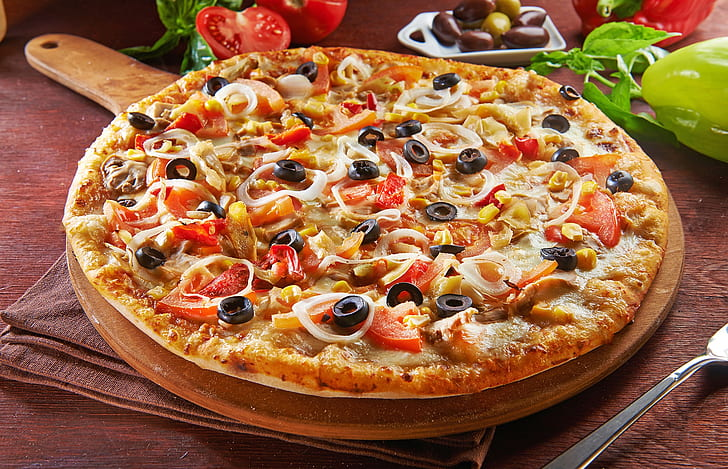

In [109]:
img

In [110]:
transformed = transform(img)
transformed

tensor([[[0.4118, 0.3137, 0.2824,  ..., 0.8353, 0.8235, 0.8235],
         [0.4431, 0.3059, 0.2549,  ..., 0.8157, 0.8235, 0.8039],
         [0.4784, 0.2745, 0.2039,  ..., 0.8196, 0.8157, 0.8196],
         ...,
         [0.4941, 0.4863, 0.4588,  ..., 0.4824, 0.5255, 0.5333],
         [0.4627, 0.4471, 0.4392,  ..., 0.4745, 0.4824, 0.4980],
         [0.4471, 0.4392, 0.4353,  ..., 0.4863, 0.4863, 0.4902]],

        [[0.1843, 0.1137, 0.1020,  ..., 0.2431, 0.3529, 0.5843],
         [0.2196, 0.1098, 0.0941,  ..., 0.2431, 0.4039, 0.5804],
         [0.2627, 0.1059, 0.0863,  ..., 0.2863, 0.5255, 0.6039],
         ...,
         [0.2588, 0.2510, 0.2471,  ..., 0.2667, 0.2902, 0.2941],
         [0.2627, 0.2471, 0.2471,  ..., 0.2510, 0.2549, 0.2588],
         [0.2667, 0.2588, 0.2745,  ..., 0.2784, 0.2824, 0.2745]],

        [[0.0706, 0.0392, 0.0431,  ..., 0.2196, 0.3098, 0.5294],
         [0.0941, 0.0431, 0.0471,  ..., 0.2196, 0.3608, 0.5373],
         [0.1216, 0.0549, 0.0627,  ..., 0.2588, 0.4784, 0.

In [111]:
import matplotlib.pyplot as plt

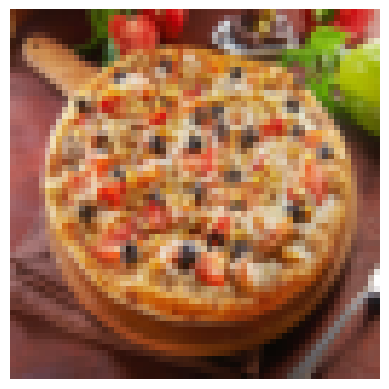

In [112]:
plt.imshow(transformed.permute(1,2,0))
plt.axis(False)
plt.show()

In [113]:
model.eval()
with torch.no_grad():
    y_pred = model(transformed.unsqueeze(0))
    print(f"prediction logits:{y_pred}")
    y_pred = torch.softmax(y_pred,dim=1)
    print(f"prediction probability:{y_pred}")
    y_pred = torch.argmax(y_pred,dim=1)
print(f"predicted image:{classidx[y_pred.data.item()]}")

prediction logits:tensor([[ 1.2316, -3.1102,  0.5122]])
prediction probability:tensor([[0.6666, 0.0087, 0.3247]])
predicted image:pizza
